In [5]:
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import offset_show
from tensorflow.python.framework import ops
%matplotlib inline

In [6]:
deformable_conv2d_module = tf.load_op_library('./deformable_conv2d_op/deformable_conv2d.so')
# deformable_conv2d_op = deformable_conv2d_module.deformable_conv2d
sess = tf.Session()
saver = tf.train.import_meta_graph('./checkpoint_dir/MyModel_deformable.meta')
saver.restore(sess, tf.train.latest_checkpoint('./checkpoint_dir'))
graph = tf.get_default_graph()

x = graph.get_tensor_by_name("input:0")
y = graph.get_tensor_by_name('label:0')
front_ground = tf.squeeze(tf.reduce_sum(graph.get_tensor_by_name('vgg_16/conv4/conv4_3/Relu:0'), reduction_indices=[3]))

loss = graph.get_tensor_by_name('loss:0')
estimated_density_map = graph.get_tensor_by_name('ed_map:0')
estimated_counting = graph.get_tensor_by_name('estimated_counting:0')
gt_counting = graph.get_tensor_by_name('gt_counting:0')
gt_map = graph.get_tensor_by_name('gt_map:0')

image_test_path = "/home/zzn/part_B_final/test_data/images_test.npy"
gt_test_path = "/home/zzn/part_B_final/test_data/gt_test.npy"
image_test_data = np.load(image_test_path)
gt_test_data = np.load(gt_test_path)
length = len(image_test_data)

INFO:tensorflow:Restoring parameters from ./checkpoint_dir/MyModel_deformable


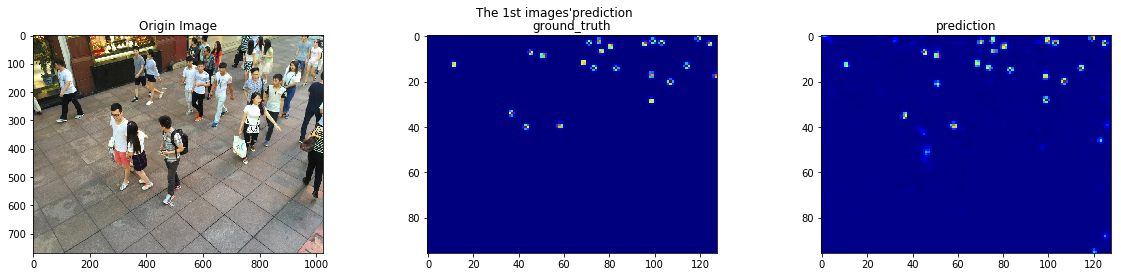

The grount truth crowd number is:22.675329208374023, and the predicting number is:22.17220687866211


In [7]:
gt_nums = []
pred_nums = []
for i in range(1):
    pred_dm = sess.run(estimated_density_map, feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    gt_num = sess.run(gt_counting, feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    pred_num = sess.run(estimated_counting, feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    map_gt = sess.run(gt_map, feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    fg = sess.run(front_ground, feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    pred_dm = np.squeeze(pred_dm)
    gt_num = np.squeeze(gt_num)
    pred_num = np.squeeze(pred_num)
    map_gt = np.squeeze(map_gt)
    
    inception_1_offset_part_1 = sess.run(graph.get_tensor_by_name('deformable_inception_1/offset_parameters_part_1/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_1_offset_part_2 = sess.run(graph.get_tensor_by_name('deformable_inception_1/offset_parameters_part_2/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_1_offset_part_3 = sess.run(graph.get_tensor_by_name('deformable_inception_1/offset_parameters_part_3/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_2_offset_part_1 = sess.run(graph.get_tensor_by_name('deformable_inception_2/offset_parameters_part_1/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_2_offset_part_2 = sess.run(graph.get_tensor_by_name('deformable_inception_2/offset_parameters_part_2/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_2_offset_part_3 = sess.run(graph.get_tensor_by_name('deformable_inception_2/offset_parameters_part_3/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_3_offset_part_1 = sess.run(graph.get_tensor_by_name('deformable_inception_3/offset_parameters_part_1/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_3_offset_part_2 = sess.run(graph.get_tensor_by_name('deformable_inception_3/offset_parameters_part_2/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    inception_3_offset_part_3 = sess.run(graph.get_tensor_by_name('deformable_inception_3/offset_parameters_part_3/BiasAdd:0'), feed_dict={x: image_test_data[i:i+1], y: gt_test_data[i:i+1]})
    
    gt_nums.append(gt_num)
    pred_nums.append(pred_num)
    
    figure, (origin, dm_gt, dm_pred, front) = plt.subplots(1, 4, figsize=(20, 4))
    origin.imshow(image_test_data[i])
    origin.set_title('Origin Image')
    dm_gt.imshow(map_gt, cmap=plt.cm.jet)
    dm_gt.set_title('ground_truth')
    dm_pred.imshow(pred_dm, cmap=plt.cm.jet)
    dm_pred.set_title('prediction')
    front.imshow(fg, cmap=plt.cm.jet)
    front.set_title('front_end')
    plt.suptitle('The ' + str(i + 1) + 'st images\'prediction')
    
    plt.show()
    sys.stdout.write('The grount truth crowd number is:{}, and the predicting number is:{}\n'.format(gt_num, pred_num))
    sys.stdout.flush()
MAE = np.mean(np.abs(np.subtract(gt_nums, pred_nums)))
MSE = np.sqrt(np.mean(np.square(np.subtract(gt_nums, pred_nums))))

In [ ]:
x = 0
density_map_coord_list = []
for i in pred_dm:
    y = 0
    for j in i:
        if j > 0.2:
            density_map_coord_list.append([x, y])
            print(x, y)
        y += 1
    x += 1
    
# for i in map_gt:
#     for j in i:
#         if True:
#             print(x, y, j)

In [4]:
inception_1_offset_part_1 = np.squeeze(inception_1_offset_part_1)
inception_1_offset_part_2 = np.squeeze(inception_1_offset_part_2)
inception_1_offset_part_3 = np.squeeze(inception_1_offset_part_3)
inception_2_offset_part_1 = np.squeeze(inception_2_offset_part_1)
inception_2_offset_part_2 = np.squeeze(inception_2_offset_part_2)
inception_2_offset_part_3 = np.squeeze(inception_2_offset_part_3)
inception_3_offset_part_1 = np.squeeze(inception_3_offset_part_1)
inception_3_offset_part_2 = np.squeeze(inception_3_offset_part_2)
inception_3_offset_part_3 = np.squeeze(inception_3_offset_part_3)
in_coords_list_inception_3_part_1 = []
in_coords_list_inception_3_part_2 = []
in_coords_list_inception_3_part_3 = []
in_coords_list_inception_2_part_1 = []
in_coords_list_inception_2_part_2 = []
in_coords_list_inception_2_part_3 = []
in_coords_list_inception_1_part_1 = []
in_coords_list_inception_1_part_2 = []
in_coords_list_inception_1_part_3 = []

# inception_3_offset_part_1 = [0 for i in range(2 * 3 * 3)]
# inception_3_offset_part_2 = [0 for i in range(2 * 5 * 5)]
# inception_3_offset_part_3 = [0 for i in range(2 * 7 * 7)]
# inception_2_offset_part_1 = [0 for i in range(2 * 3 * 3)]
# inception_2_offset_part_2 = [0 for i in range(2 * 5 * 5)]
# inception_2_offset_part_3 = [0 for i in range(2 * 7 * 7)]
# inception_1_offset_part_1 = [0 for i in range(2 * 3 * 3)]
# inception_1_offset_part_2 = [0 for i in range(2 * 5 * 5)]
# inception_1_offset_part_3 = [0 for i in range(2 * 7 * 7)]
for i in range(len(density_map_coord_list[0:1])):
    h = density_map_coord_list[i][0]
    w = density_map_coord_list[i][1]
    in_coords_list_inception_3_part_1.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 3, 3, inception_3_offset_part_1, 1, 1, 1, 1, 1, 1, 96, 128))
    in_coords_list_inception_3_part_2.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 5, 5, inception_3_offset_part_2, 1, 1, 1, 1, 2, 2, 96, 128))
    in_coords_list_inception_3_part_3.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 7, 7, inception_3_offset_part_3, 1, 1, 1, 1, 3, 3, 96, 128))

in_coords_list_inception_3_part_1 = np.reshape(in_coords_list_inception_3_part_1, [-1, 2])
in_coords_list_inception_3_part_2 = np.reshape(in_coords_list_inception_3_part_2, [-1, 2])
in_coords_list_inception_3_part_3 = np.reshape(in_coords_list_inception_3_part_3, [-1, 2])
tmp_inception_3 = np.concatenate([in_coords_list_inception_3_part_1, in_coords_list_inception_3_part_2, in_coords_list_inception_3_part_3], axis=0)
for i in range(len(tmp_inception_3)):
    h = tmp_inception_3[i][0]
    w = tmp_inception_3[i][1]
    in_coords_list_inception_2_part_1.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 3, 3, inception_2_offset_part_1, 1, 1, 1, 1, 1, 1, 96, 128))
    in_coords_list_inception_2_part_2.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 5, 5, inception_2_offset_part_2, 1, 1, 1, 1, 2, 2, 96, 128))
    in_coords_list_inception_2_part_3.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 7, 7, inception_2_offset_part_3, 1, 1, 1, 1, 3, 3, 96, 128))
in_coords_list_inception_2_part_1 = np.reshape(in_coords_list_inception_2_part_1, [-1, 2])
in_coords_list_inception_2_part_2 = np.reshape(in_coords_list_inception_2_part_2, [-1, 2])
in_coords_list_inception_2_part_3 = np.reshape(in_coords_list_inception_2_part_3, [-1, 2])
tmp_inception_2 = np.concatenate([in_coords_list_inception_2_part_1, in_coords_list_inception_2_part_2, in_coords_list_inception_2_part_3], axis=0)
for i in range(len(tmp_inception_2)):
    h = tmp_inception_2[i][0]
    w = tmp_inception_2[i][1]
    in_coords_list_inception_1_part_1.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 3, 3, inception_1_offset_part_1, 1, 1, 1, 1, 1, 1, 96, 128))
    in_coords_list_inception_1_part_2.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 5, 5, inception_1_offset_part_2, 1, 1, 1, 1, 2, 2, 96, 128))
    in_coords_list_inception_1_part_3.\
            append(offset_show.conv_coordinate_offset_showing(h, w, 7, 7, inception_1_offset_part_3, 1, 1, 1, 1, 3, 3, 96, 128))
in_coords_list_inception_1_part_1 = np.reshape(in_coords_list_inception_1_part_1, [-1, 2])
in_coords_list_inception_1_part_2 = np.reshape(in_coords_list_inception_1_part_2, [-1, 2])
in_coords_list_inception_1_part_3 = np.reshape(in_coords_list_inception_1_part_3, [-1, 2])
tmp_inception_1 = np.concatenate([in_coords_list_inception_1_part_1, in_coords_list_inception_1_part_2, in_coords_list_inception_1_part_3], axis=0)

front_end_out_coord_list = offset_show.wipe_out_repititive_tuples(tmp_inception_1)


24.229229


In [ ]:
tmp_image = [255 for i in range (3 * 96 * 128)]
tmp_image = np.reshape(tmp_image, [96, 128, 3])
offset_show.dot_image(tmp_image, front_end_out_coord_list)
figure, im = plt.subplots(1, 1, figsize=(40, 8))
im.imshow(tmp_image)
plt.show()


graph.get_operations()[40:]
# a = graph.get_tensor_by_name("deformable_inception_1/offset_mask_parameters_part_1/weights:0")
# print(sess.run(a))


INFO:tensorflow:Restoring parameters from ./checkpoint_dir/MyModel_deformable
